In [67]:
import numpy as np
from scipy.spatial.distance import cdist
from scipy.integrate import simps

def sample_tec(var, a,b,l,mean=2e12,N=1000):
    X = 1000.*np.linspace(a-0.5*b, a+0.5*b,1000)[:,None]
    X2 = cdist(X/(l*1000.),X/(l*1000.))
    K = np.sqrt(var)*np.linalg.cholesky(np.exp(-0.5*X2) + 1e-6*np.eye(1000))
    ne = mean+np.einsum('ab,bc->ac',K,np.random.normal(size=(1000,N)))
    tec = simps(ne,X[:,0],axis=0)/1e16
    
    return np.mean(tec), np.std(tec)
    
    

In [68]:
var_array = 10**np.linspace(9.,12.,10)
b_array = np.linspace(40,200,10)
hwhm_array = np.linspace(1.,20.,20)
res = np.zeros((10,10,20,2))
for i,v in enumerate(var_array):
    for j,b in enumerate(b_array):
        for k,h in enumerate(hwhm_array):
            res[i,j,k,:] = sample_tec(v**2, 350, b,h,2e12)

In [69]:
r = res[...,1]/res[...,0]
mask1 = np.abs(res[...,0] - 15.) < 5.#10 -- 20
mask2 = np.abs(res[...,1] - 0.3) < 0.2#0.1 -- 0.5

where = np.where(np.logical_and(mask1, mask2))
# print(list(zip(var_array[where[0]], b_array[where[1]], hwhm_array[where[2]])))

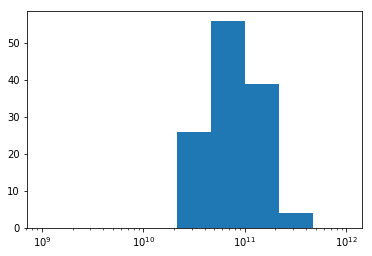

[ 2.15443469  4.64158883 10.        ]


In [73]:
import pylab as plt
plt.hist(var_array[where[0]],bins=var_array)
plt.xscale('log')
plt.show()
print(np.percentile(var_array[where[0]],[10,50,90])/1e10)

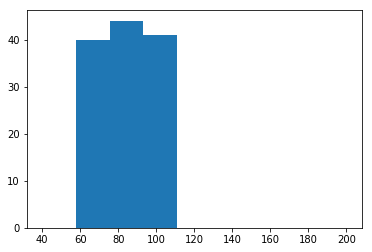

In [74]:
plt.hist(b_array[where[1]],bins=b_array)
plt.show()

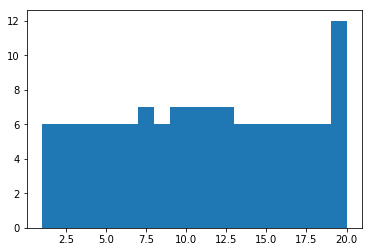

In [75]:
plt.hist(hwhm_array[where[2]],bins=hwhm_array)
plt.show()

In [ ]:
def sample_mvn(K_unconditioned, N=1):
    """
    Sample N realisations from the GP.
    
    :param K_unconditioned: float, array, [M,M]
        covariance matrix unconditioned.
    :param N: int
        number of realisations
    :return: float, array, [M, N]
        N realisations of length M
    """
    s = np.mean(np.diag(K_unconditioned))
    L = np.sqrt(s)*np.linalg.cholesky(K_unconditioned/s + 1e-6*np.eye(K_unconditioned.shape[-1]))
    return np.einsum("ab,bc->ac",L,np.random.normal(size=(L.shape[-1], N)))

In [78]:
from bayes_filter.datapack import DataPack

with DataPack('/home/albert/git/bayes_tec/scripts/data/P126+65_compact_full_raw.h5', readonly=True) as datapack:
    datapack.select(pol=slice(0,1,1))
    phase,axes = datapack.phase
    _,freqs = datapack.get_freqs(axes['freq'])
    tec = np.std(np.mean(phase*freqs[:,None]/-8.448e9,axis=-2))
    

In [79]:
tec

0.005308936422696921